# Environment Setup 

In [133]:
import os
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import xgboost as xgb

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_raw = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print("df Shape: ",df_raw.shape)
print(df_raw.columns)
df_raw.describe()

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
df Shape:  (1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF',

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Random Forest with Scikit-Learn

In [134]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

df = df_raw.copy()
y = np.log(df['SalePrice'])
X = df.drop('SalePrice',axis=1)

# Feature Engineering
X['TotalSqFeet'] = X['GrLivArea'] + X['TotalBsmtSF']
X['Age'] = X['YrSold'] - X['YearBuilt']
X['TotalBath'] = X['FullBath'] + 0.5 * X['HalfBath']
X['HasFireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
porch_features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
existing_porch_features = [feature for feature in porch_features if feature in X.columns]
X['PorchArea'] = X[existing_porch_features].sum(axis=1)

print("Total Features:",len(X.columns))
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric:", len(numeric_features),"Categorical",len(categorical_features))
numeric_imputer = KNNImputer(n_neighbors=5)
X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_features]), columns=numeric_features, index=X.index)


isolation_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = isolation_forest.fit_predict(X_numeric_imputed.values)
X = X[outliers == 1]
y = y.loc[X.index]

numeric_transformer = KNNImputer(n_neighbors=5)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

X_train, x_valid, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_pipeline.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = cross_val_score(model_pipeline, X_train, y_train, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False))
rmse_scores = np.sqrt(-rmse_scores)
print(f"Cross-validated RMSE scores: {rmse_scores}")
print(f"Mean Cross-validated RMSE: {rmse_scores.mean()}")


y_pred = model_pipeline.predict(x_valid)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error Validation Set: {rmse}")

Total Features: 85
Numeric: 42 Categorical 43
Cross-validated RMSE scores: [0.13272815 0.12103088 0.12014751 0.10648332 0.1264204 ]
Mean Cross-validated RMSE: 0.12136205224501169
Root Mean Squared Error Validation Set: 0.12093010598309385


In [135]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', KNNImputer(),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'B...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', GradientBoostingRegressor(random_state=42))])

#### Base Model:
* Mean Cross-validated RMSE: 0.1225
* Root Mean Squared Error Basic Model: 0.1237

## Feature Engineering

In [136]:
import matplotlib.pyplot as plt
model = model_pipeline.named_steps['model']
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    feature_names = numeric_features + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(feature_importance_df)

Feature Importances:
                 Feature  Importance
37           TotalSqFeet    0.391956
4            OverallQual    0.350017
26            GarageCars    0.019864
7           YearRemodAdd    0.019561
16             GrLivArea    0.018137
..                   ...         ...
145  Exterior1st_WdShing    0.000000
147  Exterior2nd_AsphShn    0.000000
48           Street_Pave    0.000000
149  Exterior2nd_BrkFace    0.000000
142   Exterior1st_Stucco    0.000000

[284 rows x 2 columns]


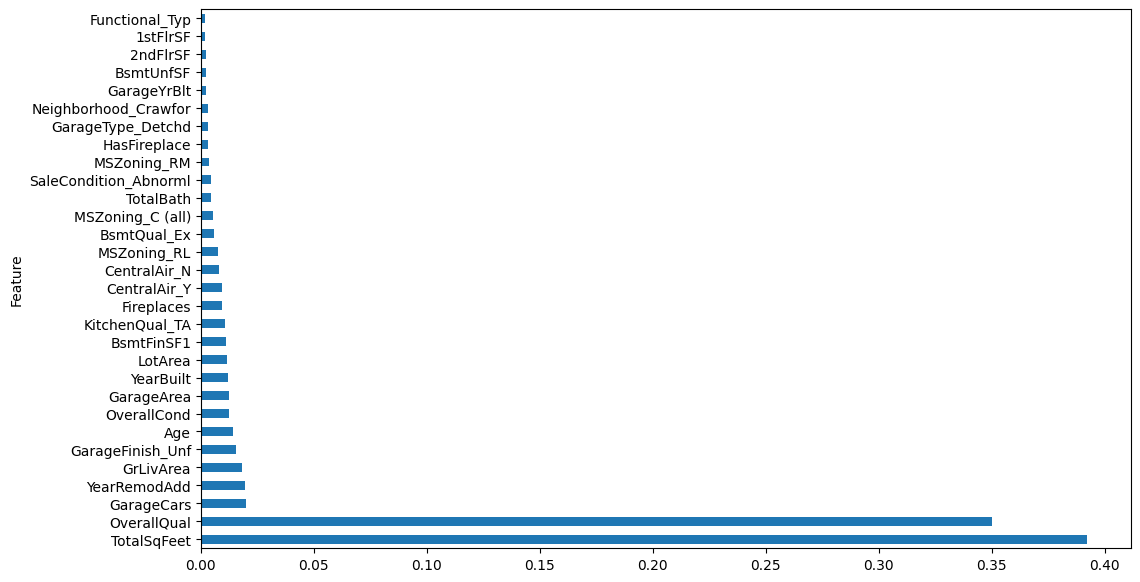

In [137]:
feature_importance_df[:30].plot('Feature', 'Importance', 'barh', figsize=(12,7), legend=False);

## Hyperparameter Tuning

In [138]:
# param_dist = {
#     'model__n_estimators': [100, 200, 300, 400],
#     'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'model__max_depth': [3, 4, 5, 6],
#     'model__min_samples_split': [2, 5, 10],
#     'model__min_samples_leaf': [1, 2, 4],
#     'model__subsample': [0.8, 0.9, 1.0]
# }

# random_search = RandomizedSearchCV(
#     estimator=best_model,
#     param_distributions=param_dist,
#     n_iter=20,  
#     cv=5,  
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,  
#     scoring='neg_mean_squared_error'
# )

# random_search.fit(X_train, y_train)

# best_model_tuned = random_search.best_estimator_
# print(f"Best parameters found: {random_search.best_params_}")

# y_pred = best_model_tuned.predict(x_valid)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f"Root Mean Squared Error (RMSE) with tuned hyperparameters: {rmse}")

## Submission

In [139]:
X_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
X_test['TotalSqFeet'] = X_test['GrLivArea'] + X_test['TotalBsmtSF']
X_test['Age'] = X_test['YrSold'] - X_test['YearBuilt']
X_test['TotalBath'] = X_test['FullBath'] + 0.5 * X_test['HalfBath']
X_test['HasFireplace'] = X_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
porch_features = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
existing_porch_features = [feature for feature in porch_features if feature in X_test.columns]
X_test['PorchArea'] = X_test[existing_porch_features].sum(axis=1)
y_pred_test = model_pipeline.predict(X_test)
submission = pd.DataFrame({
    'Id': X_test['Id'], 
    'SalePrice': np.exp(y_pred_test)
})

submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
